Classification = Accuracy  
Regression => Loss => MSE 

In [19]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
house = pd.read_csv(r'C:\Users\jun\dataScience\DataScience\data\housing.csv')

In [111]:
house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [112]:
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [113]:
house.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [114]:
house.info() # total_bedrooms --> fillna 로 결측치 처리 필요

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [115]:
# 결측치 있는지 확인
house.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

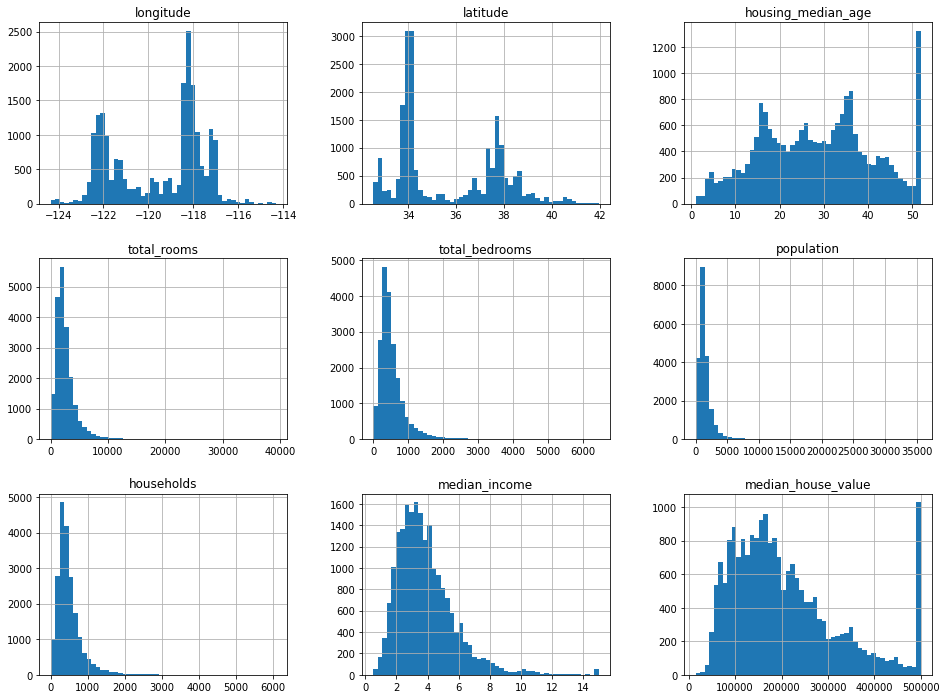

In [116]:
# bins = 갯수가 너무 많으면 구멍 숭숭 나보이고, 너무 적으면 분포도가 뭉뜨그려진다.
house.hist(bins=50, figsize=(16,12))
plt.show()

In [117]:
# 결측치 처리
medianBedrooms = house['total_bedrooms'].median()
print(medianBedrooms)
house['total_bedrooms'].fillna(medianBedrooms, inplace=True)

435.0


In [118]:
# 결측치 처리 확인
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [129]:
# 문자-> 숫자 로 바꾸는 작업과정 (one-hot encoding)
house['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [182]:
house['ocean_proximity'][:10]

0    NEAR BAY
1    NEAR BAY
2    NEAR BAY
3    NEAR BAY
4    NEAR BAY
5    NEAR BAY
6    NEAR BAY
7    NEAR BAY
8    NEAR BAY
9    NEAR BAY
Name: ocean_proximity, dtype: object

In [176]:
# ocean_num, ocean_cat = house["ocean_proximity"].factorize()
# print(ocean_cat) 
# print(ocean_num[:5])

Index(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'], dtype='object')
[0 0 0 0 0]


In [181]:
# from sklearn.preprocessing import OneHotEncoder 
# encoder = OneHotEncoder(categories = 'auto')
# ocean_enc = encoder.fit_transform(ocean_num.reshape(-1,1))
# ocean_enc.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [187]:
from sklearn.preprocessing import LabelEncoder

#LabelEncoder 모델 정의
le = LabelEncoder()

house['ocean_num'] = le.fit_transform(house['ocean_proximity']) 
house['ocean_num']
le.classes_
pd.get_dummies(house['ocean_num'][:6])
onehot = pd.get_dummies(house['ocean_num'])
onehot.columns = ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']
onehot

0        3
1        3
2        3
3        3
4        3
        ..
20635    1
20636    1
20637    1
20638    1
20639    1
Name: ocean_num, Length: 20640, dtype: int32

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

,3
0,1
1,1
2,1
3,1
4,1
5,1


,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [188]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
 10  ocean_num           20640 non-null  int32  
dtypes: float64(9), int32(1), object(1)
memory usage: 1.7+ MB


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

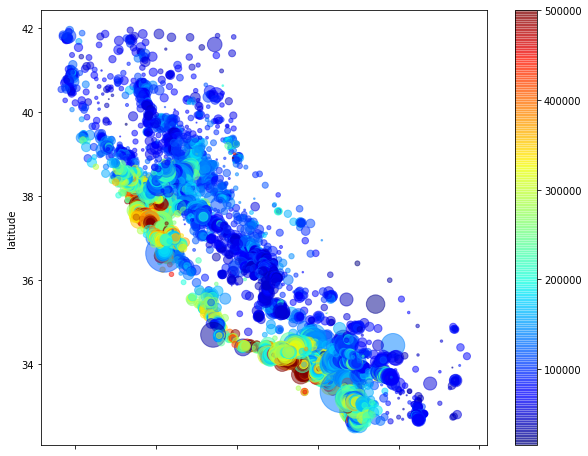

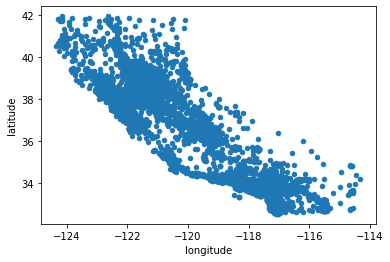

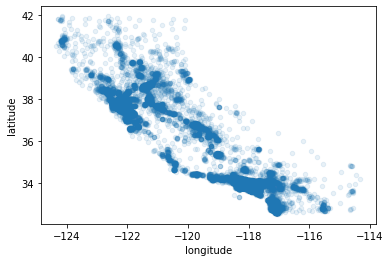

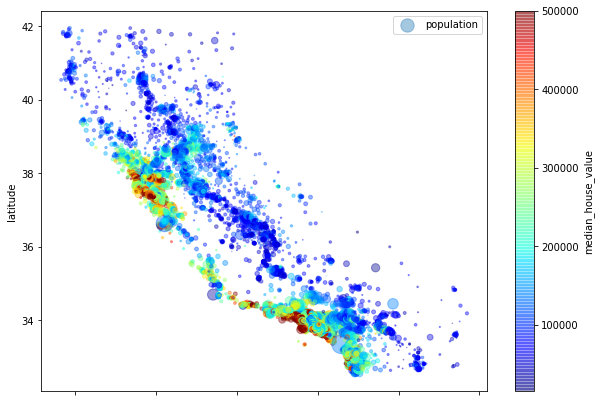

In [204]:
# 학습전 분포도 
min_x, max_x = house["longitude"].min(), house["longitude"].max()
min_y, max_y = house["latitude"].min(), house["latitude"].max()

house.plot(kind="scatter",
                 x="longitude",
                 y="latitude",
                 s=house["population"]*0.05,
                 alpha=0.5,
                 c=house["median_house_value"],
               figsize=(10,8),
                 cmap="jet")

# 같은걸 구하는데 다른 버전들로..
house.plot(kind="scatter", x="longitude", y="latitude")
house.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
house.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=house["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [189]:
# 상관관계 분석하기 with median house value. -1~1. 높을 수록 관계 up
corr_matrix = house.corr()
print(corr_matrix.median_house_value.sort_values(ascending=False))

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
ocean_num             0.081750
households            0.065843
total_bedrooms        0.049457
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


In [190]:
# y값에 넣은 median house value 와의 상관관계 분석
corr_matrix = house.corr()
print(corr_matrix["median_house_value"].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
ocean_num             0.081750
households            0.065843
total_bedrooms        0.049457
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


In [191]:
house_copy = house.drop('ocean_proximity', axis = 1)

In [192]:
house_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_num           20640 non-null  int32  
dtypes: float64(9), int32(1)
memory usage: 1.5 MB


In [193]:
# train, test 데이터 생성 - 전체데이터를 x라고 두었을 시 (그냥 궁금해서 해봄)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(house_copy, house_copy[['median_house_value']], test_size = 0.2, random_state = 42)

x_train.shape
y_train.shape
x_test.shape
y_test.shape

(16512, 10)

(16512, 1)

(4128, 10)

(4128, 1)

In [194]:
# index reset
x_train.reset_index(drop=True).head()
x_test.reset_index(drop=True).head()
y_train.reset_index(drop=True).head()
y_test.reset_index(drop=True).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_num
0,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,4
1,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,4
2,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,4
3,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,4
4,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,1


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_num
0,-119.01,36.06,25.0,1505.0,435.0,1392.0,359.0,1.6812,47700.0,1
1,-119.46,35.14,30.0,2943.0,435.0,1565.0,584.0,2.5313,45800.0,1
2,-122.44,37.80,52.0,3830.0,435.0,1310.0,963.0,3.4801,500001.0,3
3,-118.72,34.28,17.0,3051.0,435.0,1705.0,495.0,5.7376,218600.0,0
4,-121.93,36.62,34.0,2351.0,435.0,1063.0,428.0,3.7250,278000.0,4


,median_house_value
0,103000.0
1,382100.0
2,172600.0
3,93400.0
4,96500.0


,median_house_value
0,47700.0
1,45800.0
2,500001.0
3,218600.0
4,278000.0


In [195]:
# linear reression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# model정의
# n_jobs=-1이면 CPU를 모두 사용
model = LinearRegression(n_jobs=-1)

# 모델 학습
model.fit(x_train,y_train)


pred = model.predict(x_test)

pred.shape, y_test.shape

mean_squared_error(pred,y_test) # MSE
mean_absolute_error(pred, y_test) # MAE
mean_squared_error(pred, y_test, squared = False) # RMSE

LinearRegression(n_jobs=-1)

((4128, 1), (4128, 1))

1.0038702147000926e-19

2.453771759424261e-10

3.168391097544766e-10

In [196]:
# x_train, x_test 전부 median income 데이터만을 가지고 했을 경우

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(house_copy[['median_income']], house_copy[['median_house_value']], test_size = 0.2, random_state = 42)

x_train.shape
y_train.shape
x_test.shape
y_test.shape

(16512, 1)

(16512, 1)

(4128, 1)

(4128, 1)

In [197]:
# index reset
x_train.reset_index(drop=True).head()
x_test.reset_index(drop=True).head()
y_train.reset_index(drop=True).head()
y_test.reset_index(drop=True).head()

,median_income
0,3.2596
1,3.8125
2,4.1563
3,1.9425
4,3.5542


,median_income
0,1.6812
1,2.5313
2,3.4801
3,5.7376
4,3.7250


,median_house_value
0,103000.0
1,382100.0
2,172600.0
3,93400.0
4,96500.0


,median_house_value
0,47700.0
1,45800.0
2,500001.0
3,218600.0
4,278000.0


In [198]:
# linear reression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# model정의
# n_jobs=-1이면 CPU를 모두 사용
model = LinearRegression(n_jobs=-1)

# 모델 학습
model.fit(x_train,y_train)


pred = model.predict(x_test)

pred.shape, y_test.shape

mean_squared_error(pred,y_test) # MSE
mean_absolute_error(pred, y_test) # MAE
mean_squared_error(pred, y_test, squared = False) # RMSE

LinearRegression(n_jobs=-1)

((4128, 1), (4128, 1))

7091157771.76555

62990.86530093761

84209.01241414454

In [207]:
# x_train, x_test 을 median house value 와 관계있는 특정 데이터들을 가지고 했을 경우

from sklearn.model_selection import train_test_split

specialData = house_copy[['median_income', 'total_rooms', 'housing_median_age', 'ocean_num', 'households']]

x_train, x_test, y_train, y_test = train_test_split(specialData, house_copy[['median_house_value']], test_size = 0.2, random_state = 42)

x_train.shape
y_train.shape
x_test.shape
y_test.shape

(16512, 5)

(16512, 1)

(4128, 5)

(4128, 1)

In [208]:
# index reset
x_train.reset_index(drop=True).head()
x_test.reset_index(drop=True).head()
y_train.reset_index(drop=True).head()
y_test.reset_index(drop=True).head()

,median_income,total_rooms,housing_median_age,ocean_num,households
0,3.2596,3126.0,33.0,4,623.0
1,3.8125,3382.0,49.0,4,756.0
2,4.1563,1897.0,4.0,4,336.0
3,1.9425,1421.0,36.0,4,355.0
4,3.5542,2382.0,43.0,1,380.0


,median_income,total_rooms,housing_median_age,ocean_num,households
0,1.6812,1505.0,25.0,1,359.0
1,2.5313,2943.0,30.0,1,584.0
2,3.4801,3830.0,52.0,3,963.0
3,5.7376,3051.0,17.0,0,495.0
4,3.7250,2351.0,34.0,4,428.0


,median_house_value
0,103000.0
1,382100.0
2,172600.0
3,93400.0
4,96500.0


,median_house_value
0,47700.0
1,45800.0
2,500001.0
3,218600.0
4,278000.0


In [209]:
# linear reression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# model정의
# n_jobs=-1이면 CPU를 모두 사용
model = LinearRegression(n_jobs=-1)

# 모델 학습
model.fit(x_train,y_train)


pred = model.predict(x_test)

pred.shape, y_test.shape

mean_squared_error(pred,y_test) # MSE
mean_absolute_error(pred, y_test) # MAE
mean_squared_error(pred, y_test, squared = False) # RMSE

LinearRegression(n_jobs=-1)

((4128, 1), (4128, 1))

6137092356.035687

57794.17729590715

78339.59634843473

In [ ]:
# 파이프라인
from sklearn.pipeline import make_pipeline
# 파이프라인 만들때 기본적으로 스탠다드 스켈러를 적용하고 거기에 알파값 0.001 적용
# standardScaler + Ridge Model 정의
ridge_pipeline = make_pipeline(
            StandardScaler(),
            Ridge(alpha=0.001))
# fit + predict
ridge_pred = ridge_pipeline.fit(x_train, y_train).predict(x_test)